In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams

### 1. Machine Learning: Regression

Let's start with ** Ordinary Least Squares (OLS) ** Regression which is more commonly known as ** Linear Regression **. 

Depending on the number of **explanatory or dependent variables**, it can either be **Simple or Multivariate Regression**.

In case of a model with p explanatory variables, the OLS Model is represented as:
$$ Y = \beta_o \,+\, \displaystyle\sum_{j=1}^{p} \beta_{j} \, X_{j}  + \epsilon $$
                                      where **Y** is the dependent variable  
                                      **$\beta_o$** is the intercept of the model  
                                      **$X_{j}$** coresponds to the $j^{th}$ explanatory variable of the model  
** The OLS method corresponds to minimizing the sum of square differences between the observed and predicted values of Y **

#### The Dataset
** The Boston Housing Dataset ** consists of price of houses in various places in Boston. Alongside with price, the dataset also provide information such as Crime (CRIM), areas of non-retail business in the town (INDUS), the age of people who own the house (AGE), and there are many other attributes.
The dataset itself is available https://archive.ics.uci.edu/ml/machine-learning-databases/housing/.  
However, because we are going to use scikit-learn, we can import it right away from the scikit-learn itself.

Let's load the dataset and understand it better.

In [3]:
## Load Dataset from scikit-learn datasets
from sklearn.datasets import load_boston
boston = load_boston()
## Describing the Dataset and column types in general
#print boston['DESCR']
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Now let’s convert it into pandas! It’s simple, just call the pd.DataFrame() method and pass the boston.data.  
And we can check the first 5 rows with bos.head().

In [4]:
bostonDF = pd.DataFrame(boston["data"])


In [5]:
bostonDF

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [6]:
bostonDF.columns = boston['feature_names']


In [7]:
bostonDF.tail(n=5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [8]:
## Explore dimensions of dataset with shape
bostonDF.shape

(506, 13)

Does anyone realize that there is no column called ‘PRICE’ in the data frame?  
That's because the target column is available as another dictionary attribute called target.

In [9]:
## So let’s check the shape of the boston.target
print(boston.target.shape)

(506,)


In [10]:
## Add the target attribute -- we'll call it "PRICE" to the Data Frame
bostonDF['PRICE'] = boston.target
bostonDF.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
## Get a few summary statistics on the dataset
bostonDF.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
prices = bostonDF.PRICE
minimum_price = np.amin(prices)
maximum_price = np.amax(prices)
mean_price = np.mean(prices)
median_price = np.median(prices)
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${:,.2f}".format(minimum_price))
print("Maximum price: ${:,.2f}".format(maximum_price))
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price ${:,.2f}".format(median_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $5.00
Maximum price: $50.00
Mean price: $22.53
Median price $21.20
Standard deviation of prices: $9.19


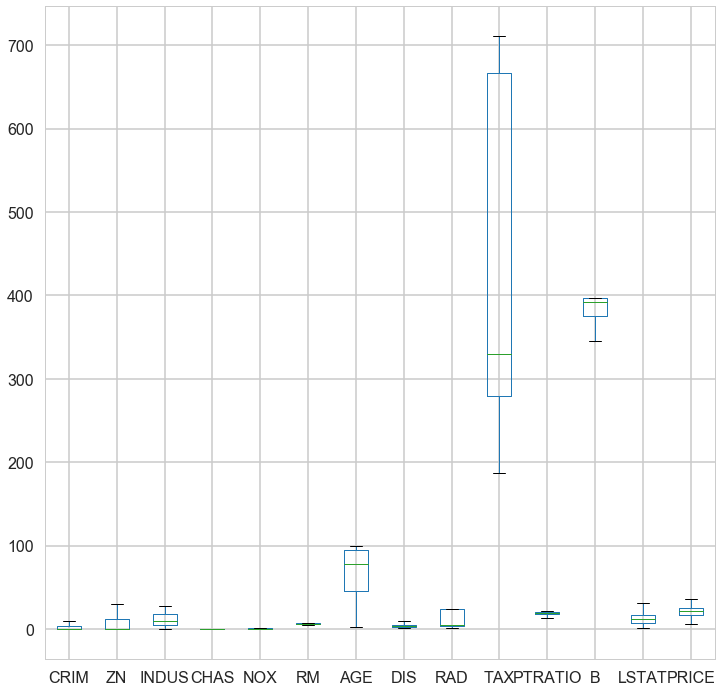

In [13]:
## using BoxPlots to understand the distribution of these variables better
plt.figure(figsize=(12, 12))
bostonDF.boxplot()

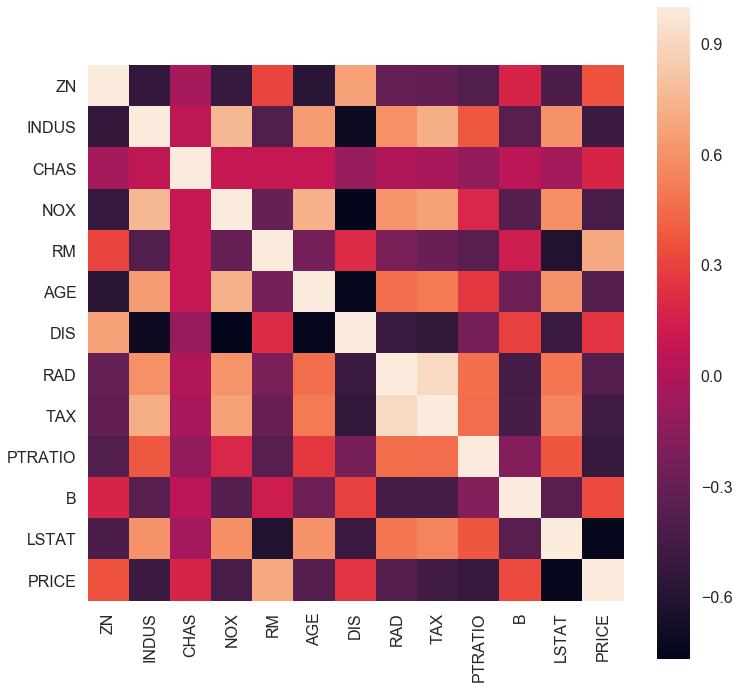

In [14]:
## Explore cross-correlations between variables with a heatmap to understand the relationships better
corr = bostonDF.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr, vmax=1, square=True)

#### Now let's create the train and test split so we can fit and test a few models on the dataset  
We'll need to split the *PRICE* variable out of the dataset before splitting

In [15]:
X = bostonDF.drop('PRICE', axis=1)
Y = bostonDF['PRICE']

In [16]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [17]:
## Let's use the sklearn train_test_split function to split the dataset into train and test
## The split used here is 75/25, you should experiment with other splits
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(379, 13)
(127, 13)
(379,)
(127,)


In [18]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
lm.coef_

array([-1.52213959e-01,  4.79017456e-02, -8.08879927e-03,  2.58311045e+00,
       -1.46998773e+01,  3.95400206e+00, -7.83430200e-03, -1.46170516e+00,
        3.45217571e-01, -1.24415767e-02, -9.20351915e-01,  1.33625399e-02,
       -5.18393389e-01])

In [20]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [21]:
lm.intercept_

32.2771010775718

In [22]:
Y_pred = lm.predict(X_test)

In [23]:
Y_pred[1]

32.10372364801537

In [24]:
Y_test

226    37.6
292    27.9
90     22.6
373    13.8
273    35.2
417    10.4
503    23.9
234    29.0
111    22.8
472    23.2
99     33.2
339    19.0
309    20.3
304    36.1
272    24.4
346    17.2
412    17.9
151    19.6
496    19.7
410    15.0
490     8.1
132    23.0
224    44.8
318    23.1
284    32.2
444    10.8
321    23.1
116    21.2
333    22.2
351    24.1
       ... 
349    26.6
212    22.4
156    13.1
480    23.0
248    24.5
33     13.1
283    50.0
418     8.8
502    20.6
402    12.1
368    50.0
201    24.1
310    16.1
343    23.9
230    24.3
395    13.1
197    30.3
451    15.2
145    13.8
184    26.4
47     16.6
9      18.9
244    17.6
340    18.7
306    33.4
334    20.7
331    17.1
53     23.4
101    26.5
464    21.4
Name: PRICE, Length: 127, dtype: float64

Text(0.5,1,'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

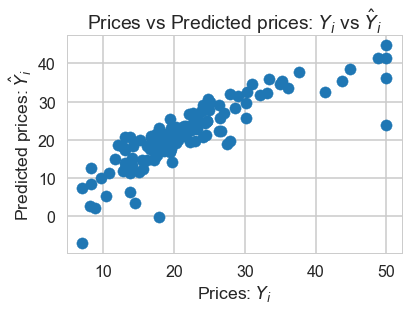

In [25]:
Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [26]:
y = Y_test
predicted = Y_pred

{'whiskers': [<matplotlib.lines.Line2D at 0x1c227b4be0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c22791550>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c227b4a58>],
 'medians': [<matplotlib.lines.Line2D at 0x1c22791e10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c227952b0>],
 'means': []}

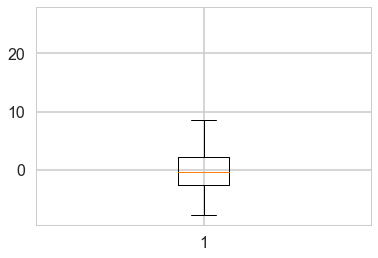

In [27]:
plt.boxplot(y-predicted)

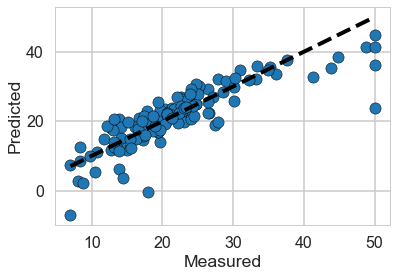

In [28]:

fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [29]:
## Estimating how close our prediction values are to the actual prices using MSE
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error on Test: ${:,.2f}".format(mse))

Mean Squared Error on Test: $24.30


Returns the coefficient of determination $R^{2}$ of the prediction.
The coefficient $R^{2}$ is defined as $(1 - u/v)$,  
where u is the residual sum of squares $\displaystyle\sum(y_{true} - y_{pred})^2)$ 
and v is the total sum of squares $\displaystyle\sum(y_{true} - \hat{y}_{true}) ^ 2$.  
The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a $R^{2}$ score of 0.0

In [30]:
## compute the R-squared with the Linear Regression Model
print("Coefficient of Determination (R-squared): " + str(lm.score(X_train, Y_train)))

Coefficient of Determination (R-squared): 0.7467970808430819


#### Engineering Features on the Dataset to improve Results

In [31]:
## From the figure above, the TAX variable had a different distribution from all the other variables
## Let's try adjusting the scale of the variable by using the logarithm of tax
X['TAX_log'] = np.log(X.TAX)

In [32]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TAX_log
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,5.690359
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,5.488938
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,5.488938
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,5.402677
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,5.402677


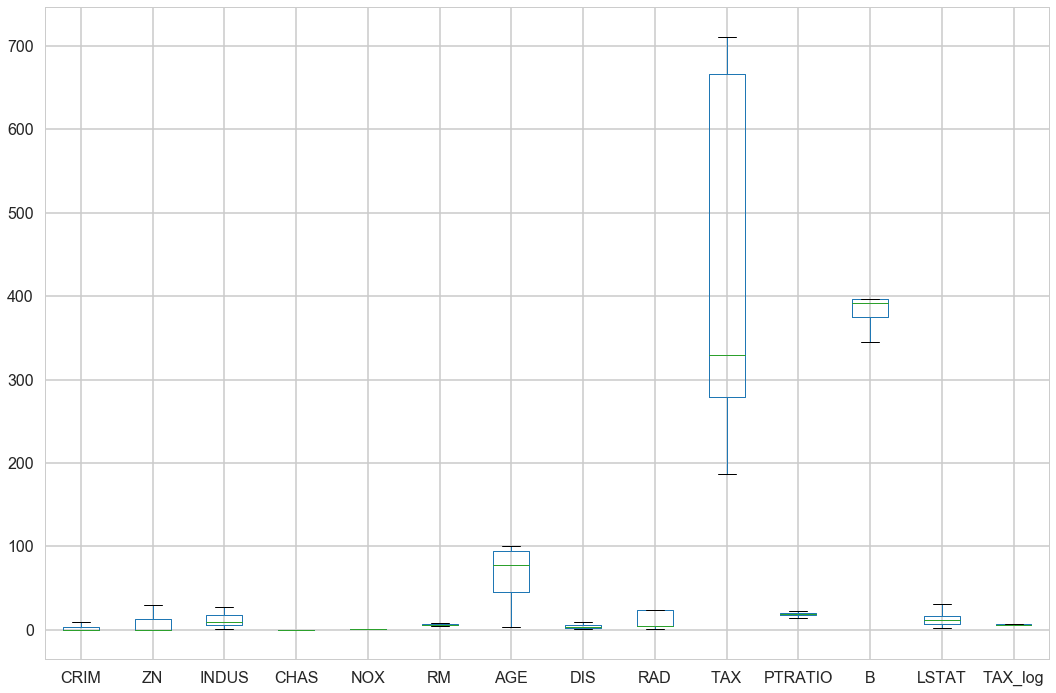

In [33]:
plt.figure(figsize=(18, 12))

X.boxplot()

Text(0.5,1,'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

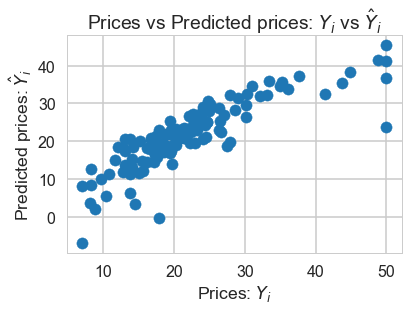

In [34]:
X_new = X.drop("TAX",axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X_new, Y, test_size = 0.25, random_state = 5)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

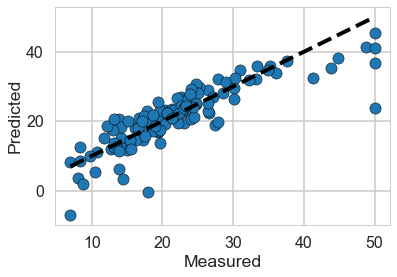

In [35]:
y = Y_test
predicted = Y_pred
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [36]:
## Estimating how close our prediction values are to the actual prices using MSE
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error on Test: ${:,.2f}".format(mse))
## compute the R-squared with the Linear Regression Model
print("Coefficient of Determination (R-squared): " + str(lm.score(X_train, Y_train)))

Mean Squared Error on Test: $24.11
Coefficient of Determination (R-squared): 0.7482489899191096


### Predicting Price using a Decision Tree Regression Model

Text(0.5,1,'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

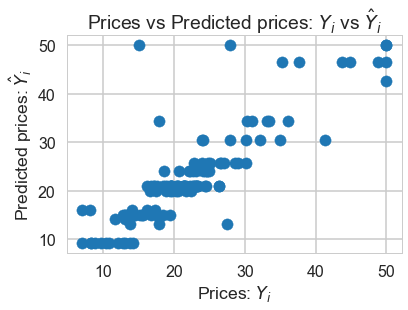

In [37]:
regressor = DecisionTreeRegressor(max_depth = 5)
regressor.fit(X_train, Y_train)

Y_pred = regressor.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

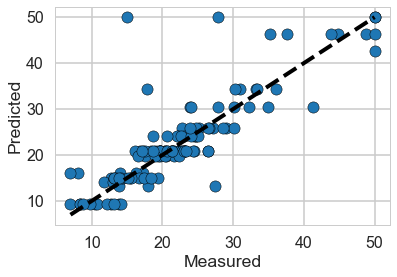

In [38]:
y = Y_test
predicted = Y_pred
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [39]:
## Estimating how close our prediction values are to the actual prices using MSE
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print("Mean Squared Error on Test: ${:,.2f}".format(mse))

Mean Squared Error on Test: $27.04


In [40]:
regressor.score(X_train, Y_train)

0.9211997611516627

In [41]:
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "matplotlib")

import matplotlib.pyplot as pl
import numpy as np
import sklearn.learning_curve as curves
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import ShuffleSplit, train_test_split

def ModelLearning(X, y):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing scores for each model are then plotted. """
    
    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.2, random_state = 0)

    # Generate the training set sizes increasing by 50
    train_sizes = np.rint(np.linspace(1, X.shape[0]*0.8 - 1, 9)).astype(int)

    # Create the figure window
    fig = pl.figure(figsize=(10,7))

    # Create three different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        
        # Create a Decision tree regressor at max_depth = depth
        regressor = DecisionTreeRegressor(max_depth = depth)

        # Calculate the training and testing scores
        sizes, train_scores, test_scores = curves.learning_curve(regressor, X, y, \
            cv = cv, train_sizes = train_sizes, scoring = 'r2')
        
        # Find the mean and standard deviation for smoothing
        train_std = np.std(train_scores, axis = 1)
        train_mean = np.mean(train_scores, axis = 1)
        test_std = np.std(test_scores, axis = 1)
        test_mean = np.mean(test_scores, axis = 1)

        # Subplot the learning curve 
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, train_mean, 'o-', color = 'r', label = 'Training Score')
        ax.plot(sizes, test_mean, 'o-', color = 'g', label = 'Testing Score')
        ax.fill_between(sizes, train_mean - train_std, \
            train_mean + train_std, alpha = 0.15, color = 'r')
        ax.fill_between(sizes, test_mean - test_std, \
            test_mean + test_std, alpha = 0.15, color = 'g')
        
        # Labels
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Training Points')
        ax.set_ylabel('Score')
        ax.set_xlim([0, X.shape[0]*0.8])
        ax.set_ylim([-0.05, 1.05])
    
    # Visual aesthetics
    ax.legend(bbox_to_anchor=(1.05, 2.05), loc='lower left', borderaxespad = 0.)
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize = 16, y = 1.03)
    fig.tight_layout()
    fig.show()

/Users/mokkapap/anaconda/envs/py365/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/mokkapap/anaconda/envs/py365/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


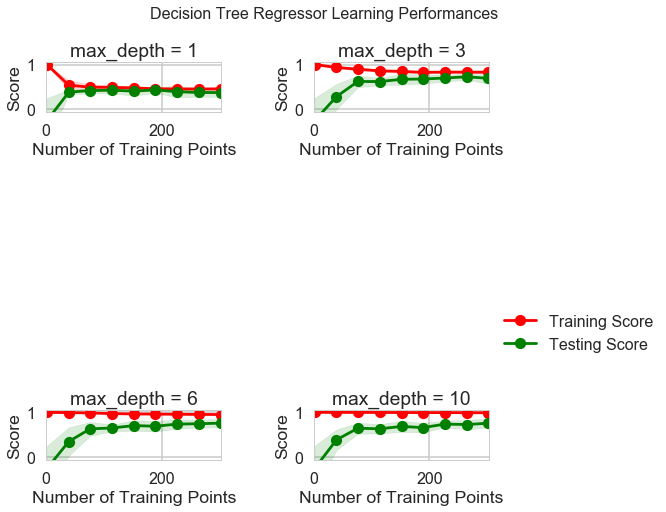

In [42]:
ModelLearning(X_train, Y_train)

The cell above produces four graphs for **Decision Tree models with different maximum depths**.  
Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased.  
Note that the shaded reigon of a learning curve denotes the uncertainty of that curve (measured as the standard deviation).   
The model is scored on both the training and testing sets using **$R^{2}$, the coefficient of determination.**

#### Some Questions the Decision Tree Analyses help us Analyze:
** Which maximum depth do you think results in a model that best generalizes to unseen data? **  
Answer: We should use the model with max depth 4 in the real world, since it has the lowest validation error. To put it another way, it's shown the best predictive ability when faced with new data. Remember, the coefficient of determination $R^{2}$ helps estimate the generalizability of the model.

** Bias-Variance Tradeoff**
At max depth 1, we have a model with high bias, and we know this because both testing and validation error are high and close together. At max depth 10, we have a case of overfitting. The training error is very low, but validation is leveling out with high error. This helps us estimate the parameter region that might be just what we're looking for!

Again, looking at the decision tree with max depth 3, we can see that as we add more training data, the training curve shows a decrease in $R^2$ approaching $R^2 = 0.8$, but the testing score improves, also approaching $R^2 = 0.8$. This indicates a model with a notable amount of bias, thus more data would not improve the $R^2$ score. Compare that to the decision tree with a max depth of 10, which might benefit from some fresh training points.

### Questions and Comments...